<a href="https://colab.research.google.com/github/Shashank-016/Room_Occupancy_EDA/blob/main/Room_detection_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files


uploaded = files.upload()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('test_data.csv')

# Initial data inspection
print("Shape:", df.shape)
print("First few rows:\n", df.head())
print("Data Types:\n", df.dtypes)
print("Missing values:\n", df.isna().sum())
print("Column Names:", df.columns.tolist())


Shape: (9059, 23)
First few rows:
   timestamp  stationary_target_distance_cm_1  stationary_target_energy_1  \
0  09:51:51                               91                         100   
1  09:51:53                               73                         100   
2  09:51:55                               76                         100   
3  09:51:57                               87                         100   
4  09:51:59                               90                         100   

   moving_target_distance_cm_1  moving_target_energy_1  light_intensity_lux_1  \
0                           76                     100                  15.00   
1                           76                      72                  15.00   
2                           69                     100                  15.83   
3                           -1                      -1                  15.00   
4                           78                     100                  15.00   

   temperature_celsiu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def remove_outliers_iqr(df):
    # Select numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1

    # Filter within the IQR range
    filtered_df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return filtered_df

# Apply IQR-based outlier removal
cleaned_df = remove_outliers_iqr(df)
print("Data after outlier removal:", cleaned_df.shape)
print("First few rows after outlier removal:\n", cleaned_df.head())


Data after outlier removal: (2925, 23)
First few rows after outlier removal:
     timestamp  stationary_target_distance_cm_1  stationary_target_energy_1  \
121  09:55:53                               82                         100   
126  09:56:03                               93                         100   
128  09:56:07                               97                         100   
134  09:56:19                              150                         100   
137  09:56:25                               79                         100   

     moving_target_distance_cm_1  moving_target_energy_1  \
121                           -1                      -1   
126                           81                      87   
128                          104                      61   
134                          139                      42   
137                           86                      56   

     light_intensity_lux_1  temperature_celsius_1  humidity_%_1  \
121                   22.

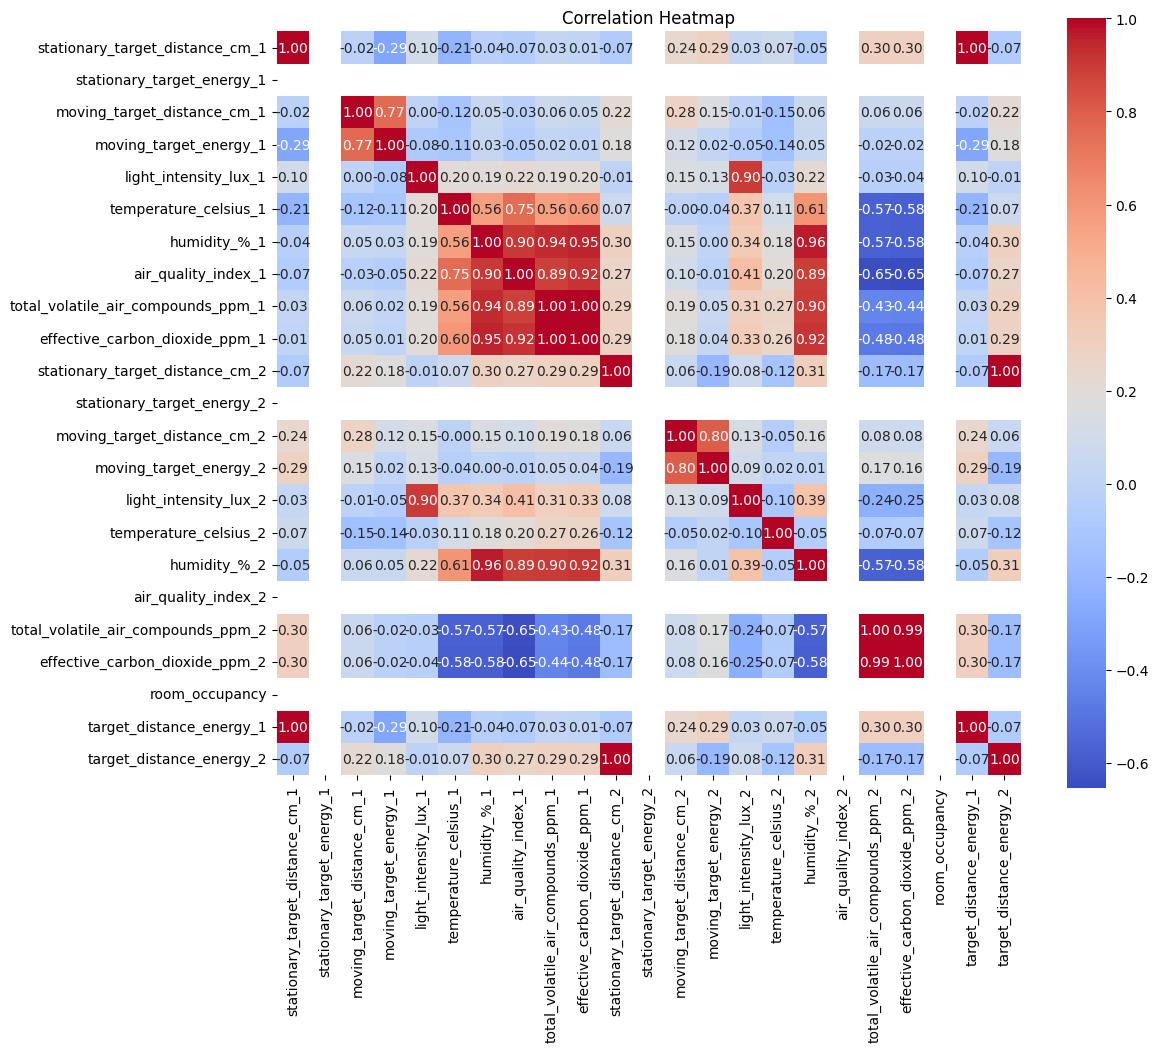

In [ ]:
;# Assuming cleaned_df is already defined from previous steps
# Select only numeric columns for correlation
numeric_df = cleaned_df.select_dtypes(include=[np.number])

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Bivariate Analysis
# Pairplot for numeric columns
# Assuming cleaned_df is already defined from previous steps
# Select only numeric columns for correlation
numeric_df = cleaned_df.select_dtypes(include=[np.number])
sns.pairplot(cleaned_df[numeric_columns])
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()


In [ ]:
#Univariate Analysis
# Assuming cleaned_df is already defined from previous steps
# Select only numeric columns for correlation
numeric_df = cleaned_df.select_dtypes(include=[np.number])
# Histograms of each numeric feature
cleaned_df[numeric_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Features')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
# Assuming cleaned_df is already defined from previous steps
# Select only numeric columns for correlation
numeric_df = cleaned_df.select_dtypes(include=[np.number])
# Check skewness and kurtosis
skewness = cleaned_df[numeric_columns].skew()
kurtosis = cleaned_df[numeric_columns].kurt()
print("Skewness of Numeric Features:\n", skewness)
print("Kurtosis of Numeric Features:\n", kurtosis)
